An online grocery store has captured amount spent per annum (in Indian rupees) by 20 customers on apparel and beauty and healthcare products and given in the file *customerspends.csv*. It contains the following records.

* Customer - Customer ID
* Apparel - Amount spent in apparel products
* Beauty and Healthcare - Amount spent in beauty and healthcare.


**Q1. Create a scatter plot to depict the customer spends on apparel and beauty and healthcare products. Identify number of scatters exisiting in the dataset.**

**Ans:-**

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
cust_spend_df = pd.read_csv('customerspends.csv')
cust_spend_df.head()

,Customer,Apparel,Beauty and Healthcare
0,1,21.10,0.7
1,2,15.23,5.5
2,3,5.22,18.6
3,4,31.10,1.8
4,5,6.12,21.5


In [14]:
cust_spend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer               20 non-null     int64  
 1   Apparel                20 non-null     float64
 2   Beauty and Healthcare  20 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 612.0 bytes


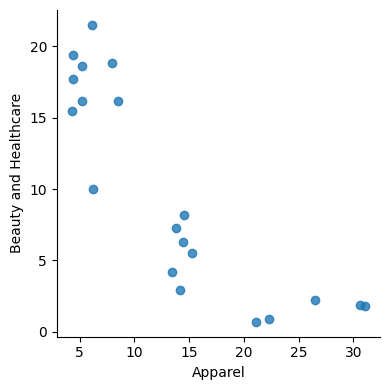

In [15]:
sn.lmplot(x="Apparel", y="Beauty and Healthcare", data=cust_spend_df, fit_reg=False, height=4)

Here we can see that there are three cluster groups:-

* Spends money > 10 on Beauty and Healthcare and spends money between 5 and 10 on Apparel.
* Spends money (10, 20) on Apparel and between (0, 10) on Beauty and Healthcare.
* Spends money (0, 5) on Beauty and Healthcare and (20, 30) on Apparel.

**Q2. Normalize the features using StandardScaler and plot them in the scatter plot again.**

**Ans:-**

In [21]:
scaler = StandardScaler()
scaled_cusf = scaler.fit_transform(cust_spend_df)
scaled_cust_df = pd.DataFrame(scaled_cusf, columns=cust_spend_df.columns)
scaled_cust_df.head()

,Customer,Apparel,Beauty and Healthcare
0,-1.647509,0.892371,-1.266880
1,-1.474087,0.206471,-0.597753
2,-1.300665,-0.963181,1.228405
3,-1.127243,2.060855,-1.113539
4,-0.953821,-0.858018,1.632670


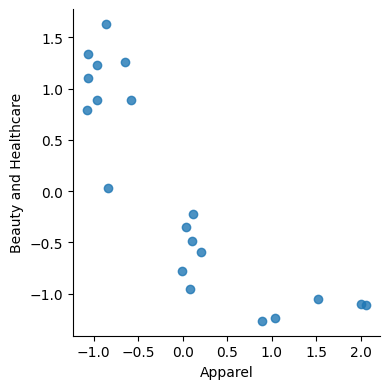

In [22]:
sn.lmplot(x="Apparel", y="Beauty and Healthcare", data=scaled_cust_df, fit_reg=False, height=4)

**Q3. Use dendogram and elbow method to verify if the number of clusters suggested is same as clusters visible in the scatter plot in Question 1.**

**Ans:-**

**1. Using Dendogram**

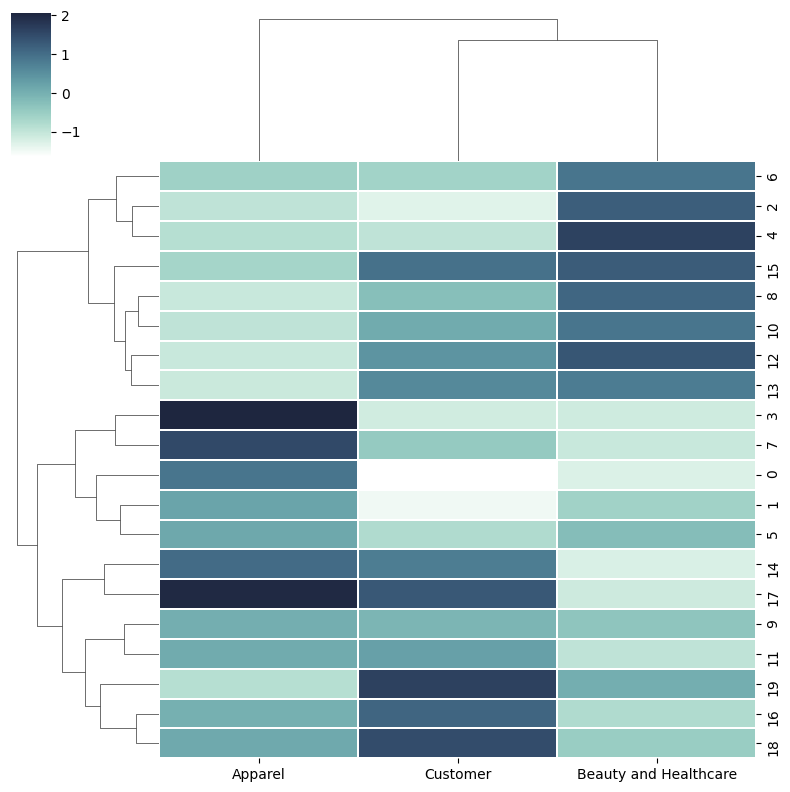

In [24]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
sn.clustermap(scaled_cust_df, cmap=cmap, linewidths=.2, figsize=(8, 8))

**Finding Optimal number of clusters using Elbow Curve Method**